In [17]:
pip install imblearn

     |████████████████████████████████| 206 kB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures 
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix, matthews_corrcoef, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from imblearn.pipeline import Pipeline
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.linear_model  import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('df_preprocessed.csv')

Some housekeeping...

In [3]:
df.head()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,...,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,0,9046,67.0,0,1,228.69,36.6,1,0,1,...,0,0,1,0,0,0,1,1,0,0
1,1,51676,61.0,0,0,202.21,NaN,1,1,0,...,0,0,0,1,0,1,0,0,1,0
2,2,31112,80.0,0,1,105.92,32.5,1,0,1,...,0,0,1,0,0,1,0,0,1,0
3,3,60182,49.0,0,0,171.23,34.4,1,1,0,...,0,0,1,0,0,0,1,0,0,1
4,4,1665,79.0,1,0,174.12,24.0,1,1,0,...,0,0,0,1,0,1,0,0,1,0


In [4]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [5]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Female', 'Male', 'No', 'Yes', 'Govt_job', 'Never_worked',
       'Private', 'Self-employed', 'children', 'Rural', 'Urban',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')

In [6]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0


# Initial Logistic Regression

In [7]:
#numerical_features = ['age', 'avg_glucose_level', 'bmi']

In [8]:
#categorical_features = ['hypertension', 'heart_disease', 'Female', 'Male', 'No', 'Yes', 'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children',
       #'Rural', 'Urban', 'formerly smoked', 'never smoked', 'smokes']

In [9]:
#numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),('scaler', MinMaxScaler())])
#imp = SimpleImputer(strategy='median')

In [10]:
#categorical_transformer = Pipeline(steps=[
    #('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [11]:
#preprocessor = ColumnTransformer(
    #transformers=[
        #('num', numeric_transformer, imp, numerical_features),
        #('cat', categorical_transformer, categorical_features)])

First, we will use a logistic regression model to fit the data, while imputing the median for missing BMI values.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='stroke'), 
                                                    df.stroke, test_size=0.3)

In [13]:
scaler = MinMaxScaler()
imp = SimpleImputer(strategy='median')
X_train_transformed = imp.fit_transform(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = imp.transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

In [14]:
lr = LogisticRegression(max_iter=10000)
clf = Pipeline([('lr', lr)])
clf.fit(X_train_transformed, y_train)
model_res = clf.fit(X_train_transformed, y_train)
y_pred = model_res.predict(X_test_transformed)
y_pred_prob = model_res.predict_proba(X_test_transformed)

In [15]:
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Logistic Regression: Accuracy = %.3f' % (ac))

print('Logistic Regression: f1-score = %.3f' % (f1))

Logistic Regression: Accuracy = 0.948
Logistic Regression: f1-score = 0.923


In [16]:
cm

array([[1454,    0],
       [  79,    0]])

In [17]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/Users/ryan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


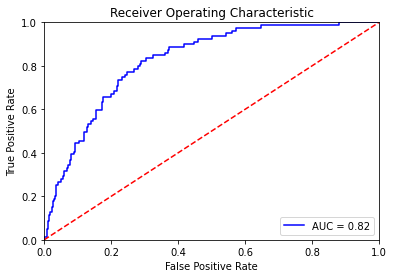

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test_transformed)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
aps = average_precision_score(y_test, y_pred)
print('Logistic Regression: average_precision_score = %.3f' % (aps))

Logistic Regression: average_precision_score = 0.052


In [20]:
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient: matthews correlation coefficient = %.3f' % (mcc))

Matthews Correlation Coefficient: matthews correlation coefficient = 0.000


/Users/ryan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Our initial and hyperparameter-less logistic regression model only predicts negative cases, which makes it worthless in spite of its high overall accuracy and F1 scores.

# Random Forest

Next, we will use a random forest model to fit the data, while again imputing the median for missing BMI values.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='stroke'), 
                                                    df.stroke, test_size=0.3)
scaler = MinMaxScaler()
imp = SimpleImputer(strategy='median')
X_train_transformed = imp.fit_transform(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = imp.transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
clf = Pipeline([('rfc', rfc)])
model_res = clf.fit(X_train_transformed, y_train)
y_pred = model_res.predict(X_test_transformed)
y_pred_prob = model_res.predict_proba(X_test_transformed)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.952
Random Forest: f1-score=0.932


In [23]:
cm

array([[1459,    6],
       [  68,    0]])

In [24]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



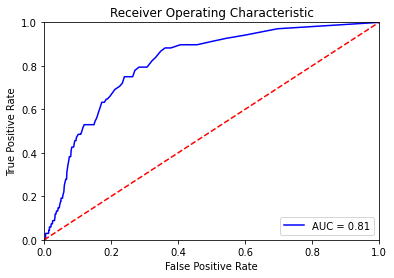

In [25]:
import sklearn.metrics as metrics
probs = clf.predict_proba(X_test_transformed)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
aps = average_precision_score(y_test, y_pred)
print('Random Forest: average_precision_score = %.3f' % (aps))

Random Forest: average_precision_score = 0.044


In [27]:
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient: matthews correlation coefficient = %.3f' % (mcc))

Matthews Correlation Coefficient: matthews correlation coefficient = -0.014


The initial hyperparameter-less random forest model is slightly more willing to predict positive cases than its logistic regression based counterpart, but it it is still far too hesitant for it to end up being an effective model.

# Modeling with the class_weight hyperparameter

The class_weight parameter allows us to give more weight to positive stroke cases for our model construction

#### Logistic Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='stroke'), 
                                                    df.stroke, test_size=0.3)
scaler = MinMaxScaler()
imp = SimpleImputer(strategy='median')
X_train_transformed = imp.fit_transform(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = imp.transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

In [29]:
lr = LogisticRegression(max_iter=10000, class_weight={0:1, 1:99})
clf = Pipeline([('lr', lr)])
clf.fit(X_train_transformed, y_train)
model_res = clf.fit(X_train_transformed, y_train)
y_pred = model_res.predict(X_test_transformed)
y_pred_prob = model_res.predict_proba(X_test_transformed)

In [30]:
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Logistic Regression with untuned class_weight: Accuracy = %.3f' % (ac))

print('Logistic Regression with untuned class_weight: f1-score = %.3f' % (f1))

Logistic Regression with untuned class_weight: Accuracy = 0.485
Logistic Regression with untuned class_weight: f1-score = 0.605


In [31]:
cm

array([[669, 784],
       [  5,  75]])

In [32]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.99      0.46      0.63      1453
           1       0.09      0.94      0.16        80

    accuracy                           0.49      1533
   macro avg       0.54      0.70      0.39      1533
weighted avg       0.95      0.49      0.60      1533



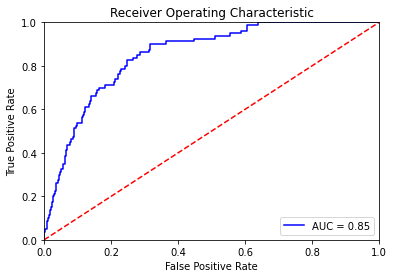

In [33]:
probs = clf.predict_proba(X_test_transformed)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
aps = average_precision_score(y_test, y_pred)
print('Logistic Regression with untuned class_weight: average_precision_score = %.3f' % (aps))

Logistic Regression with untuned class_weight: average_precision_score = 0.085


In [35]:
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient with untuned class_weight: matthews correlation coefficient = %.3f' % (mcc))

Matthews Correlation Coefficient with untuned class_weight: matthews correlation coefficient = 0.178


#### Random Forest

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='stroke'), 
                                                    df.stroke, test_size=0.3)
scaler = MinMaxScaler()
imp = SimpleImputer(strategy='median')
X_train_transformed = imp.fit_transform(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = imp.transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

In [37]:
rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1,class_weight={0:1, 1:99})
clf = Pipeline([('rfc', rfc)])
model_res = clf.fit(X_train_transformed, y_train)
y_pred = model_res.predict(X_test_transformed)
y_pred_prob = model_res.predict_proba(X_test_transformed)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.945
Random Forest: f1-score=0.919


In [38]:
cm

array([[1449,    1],
       [  83,    0]])

In [39]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [35]:
aps = average_precision_score(y_test, y_pred)
print('Random Forest: average_precision_score = %.3f' % (aps))

Random Forest: average_precision_score = 0.049


In [36]:
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient: matthews correlation coefficient = %.3f' % (mcc))

Matthews Correlation Coefficient: matthews correlation coefficient = -0.012


We can see that simply adding the class_weight parameter without tuning it doesn't make for a particularly better model. The logistic regression based model predicts far too many positive cases, while the Random Forest model only predicts 1. For our final models, we will tune class_weight using the GridSearchCV function.

# Tuning with GridSearchCV

#### Logistic Regression 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='stroke'), 
                                                    df.stroke, test_size=0.3)
scaler = MinMaxScaler()
imp = SimpleImputer(strategy='median')
X_train_transformed = imp.fit_transform(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = imp.transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

In [41]:
w = [ {0:1.0,1:5},{0:1.0,1:6},{0:1.0,1:7},{0:1.0,1:8},{0:1.0,1:9},
     {0:1.0,1:10}, {0:1.0,1:11},{0:1.0,1:12},{0:1.0,1:13},{0:1.0,1:14},{0:1.0,1:15}, {0:1.0,1:20}, 
     {0:1.0,1:25},{0:1.0,1:50},{0:1.0,1:75},
     {0:1.0,1:99}, {0:1.0,1:100}]
hyperparam_grid = {"class_weight": w}

In [42]:
lr = LogisticRegression(max_iter=10000, random_state=13)
# define evaluation procedure
grid = GridSearchCV(lr,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train_transformed, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8420588235294119 with param: {'class_weight': {0: 1.0, 1: 25}}


In [43]:
lr = LogisticRegression(max_iter=10000, random_state=13, class_weight={0:1, 1:25})
clf = Pipeline([('lr', lr)])
clf.fit(X_train_transformed, y_train)
model_res = clf.fit(X_train_transformed, y_train)
y_pred = model_res.predict(X_test_transformed)
y_pred_prob = model_res.predict_proba(X_test_transformed)

In [44]:
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Logistic Regression with tuned class_weight: Accuracy = %.3f' % (ac))

print('Logistic Regression with tuned class_weight: f1-score = %.3f' % (f1))

Logistic Regression with tuned class_weight: Accuracy = 0.683
Logistic Regression with tuned class_weight: f1-score = 0.774


In [45]:
cm

array([[986, 475],
       [ 11,  61]])

In [46]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1461
           1       0.11      0.85      0.20        72

    accuracy                           0.68      1533
   macro avg       0.55      0.76      0.50      1533
weighted avg       0.95      0.68      0.77      1533



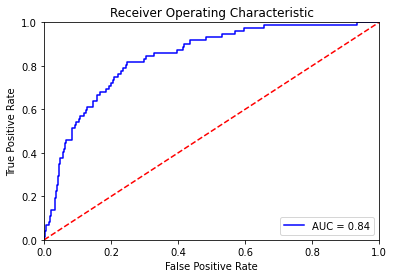

In [47]:
probs = clf.predict_proba(X_test_transformed)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
aps = average_precision_score(y_test, y_pred)
print('Logistic Regression with tuned class_weight: average_precision_score = %.3f' % (aps))

Logistic Regression with tuned class_weight: average_precision_score = 0.104


In [49]:
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient with tuned class_weight: matthews correlation coefficient = %.3f' % (mcc))

Matthews Correlation Coefficient with tuned class_weight: matthews correlation coefficient = 0.232


#### Random Forest

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='stroke'), 
                                                    df.stroke, test_size=0.3)
scaler = MinMaxScaler()
imp = SimpleImputer(strategy='median')
X_train_transformed = imp.fit_transform(X_train)
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = imp.transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

In [51]:
w = [{0:1.0,1:5},{0:1.0,1:6},{0:1.0,1:7},{0:1.0,1:8},{0:1.0,1:9},
     {0:1.0,1:10}, {0:1.0,1:11},{0:1.0,1:12},{0:1.0,1:13},{0:1.0,1:14},{0:1.0,1:15}, {0:1.0,1:20}, 
     {0:1.0,1:25},{0:1.0,1:50},{0:1.0,1:75},
     {0:1.0,1:99}, {0:1.0,1:100}]

hyperparam_grid = {"class_weight": w}

In [52]:
rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
# define evaluation procedure
grid = GridSearchCV(rfc,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train_transformed, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8003970588235295 with param: {'class_weight': {0: 1.0, 1: 20}}


In [54]:
rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1,class_weight={0:1, 1:20})
clf = Pipeline([('rfc', rfc)])
model_res = clf.fit(X_train_transformed, y_train)
y_pred = model_res.predict(X_test_transformed)
y_pred_prob = model_res.predict_proba(X_test_transformed)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.950
Random Forest: f1-score=0.926


In [55]:
cm

array([[1456,    1],
       [  76,    0]])

In [56]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



In [57]:
aps = average_precision_score(y_test, y_pred)
print('Random Forest: average_precision_score = %.3f' % (aps))

Random Forest: average_precision_score = 0.050


In [58]:
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient: matthews correlation coefficient = %.3f' % (mcc))

Matthews Correlation Coefficient: matthews correlation coefficient = -0.006


Tuning with GridSearchCV made our logistic regression model significantly better, but it didn't do much for the random forest model. The logistical regression model with with param: {'class_weight': {0: 1.0, 1: 20}}

# 

In [52]:
import shap
explainer = shap.Explainer(lr, X_train_transformed, feature_names=df.columns)
shap_values = explainer(X_test_transformed)


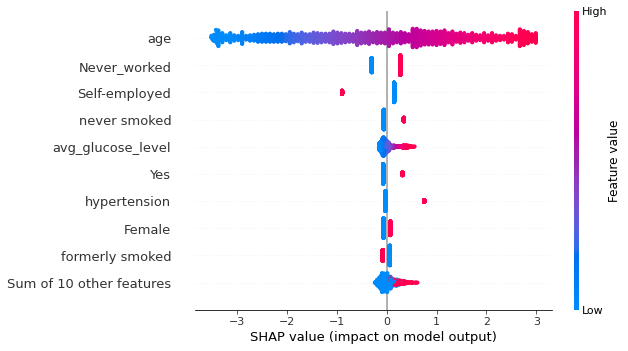

In [53]:
shap.plots.beeswarm(shap_values)